# Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# For Lebel Encoder
from sklearn.preprocessing import LabelEncoder
# Algorithm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# For Spliting
from sklearn.model_selection import train_test_split
# For Accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score

%matplotlib inline


In [3]:
# Load The Data 

In [4]:
df = pd.read_excel(r"Dataset.xlsx")
df.head()

,Customer,Purchase Type,Quantity,Price,Income Household,Household Size,Color(Rice),Texture (After Cook),Cooking time,Durability after Cooking,Taste,Aroma,Rice Type
0,1,Wholesale,More,Discount,Less,Large,YW,Thik,Long,Long,Not Acceptable,No,Atash
1,2,Wholesale,More,Discount,Avg,Large,YW,Thin,Long,Short,Acceptale,No,Miniket
2,3,Retail,Less,Not Discount,More,Small,YW,Thin,Short,Long,Good,Yes,Katari Bhog
3,4,Retail,Less,No Discount,More,Small,PW,Thin & Tall,Short,Long,Good,Yes,Bashmoti
4,5,Wholesale,Avg,Discount,Less,Large,YW,Thik,Long,Acceptable,Acceptale,No,Payjam


In [5]:
df.tail()

,Customer,Purchase Type,Quantity,Price,Income Household,Household Size,Color(Rice),Texture (After Cook),Cooking time,Durability after Cooking,Taste,Aroma,Rice Type
255,256,Retail,Less,Not Discount,More,Small,PW,Thin,Short,Long,Good,Yes,Chinigura
256,257,Retail,More,Discount,Avg,Small,YW,Thin,Short,Long,Good,Yes,Katari Bhog
257,258,Retail,Avg,Not Discount,More,Small,RW,Thin,Short,Acceptable,Good,Yes,Beroi
258,259,Wholesale,Avg,Discount,Avg,Medium,YW,Thik,Long,Long,Not Acceptable,No,Atash
259,260,Wholesale,More,Not Discount,More,Small,PW,Thin,Short,Long,Good,Yes,Kalijira


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Customer                  260 non-null    int64 
 1   Purchase Type             259 non-null    object
 2   Quantity                  259 non-null    object
 3   Price                     259 non-null    object
 4   Income Household          259 non-null    object
 5   Household Size            259 non-null    object
 6   Color(Rice)               259 non-null    object
 7   Texture (After Cook)      259 non-null    object
 8   Cooking time              259 non-null    object
 9   Durability after Cooking  259 non-null    object
 10  Taste                     259 non-null    object
 11  Aroma                     259 non-null    object
 12  Rice Type                 259 non-null    object
dtypes: int64(1), object(12)
memory usage: 26.5+ KB


In [7]:
# as we don't need customer id so let's set the Customer column as index
df = df.set_index('Customer')

In [8]:
df.columns

Index(['Purchase Type', 'Quantity', 'Price', 'Income Household',
       'Household Size', 'Color(Rice)', 'Texture (After Cook)', 'Cooking time',
       'Durability after Cooking', 'Taste', 'Aroma', 'Rice Type'],
      dtype='object')

In [9]:
df.describe().T

,count,unique,top,freq
Purchase Type,259,4,Retail,182
Quantity,259,5,More,92
Price,259,4,Not Discount,136
Income Household,259,5,Avg,101
Household Size,259,4,Small,101
Color(Rice),259,3,YW,138
Texture (After Cook),259,3,Thin,192
Cooking time,259,2,Short,162
Durability after Cooking,259,3,Long,121
Taste,259,3,Good,162


In [10]:
df.shape

(260, 12)

In [11]:
# Check the Null values

In [12]:
df.isnull().sum()

Purchase Type               1
Quantity                    1
Price                       1
Income Household            1
Household Size              1
Color(Rice)                 1
Texture (After Cook)        1
Cooking time                1
Durability after Cooking    1
Taste                       1
Aroma                       1
Rice Type                   1
dtype: int64

In [13]:
# so all has the null values we have to remove it 

In [14]:
df = df.dropna()
df.isnull().sum()

Purchase Type               0
Quantity                    0
Price                       0
Income Household            0
Household Size              0
Color(Rice)                 0
Texture (After Cook)        0
Cooking time                0
Durability after Cooking    0
Taste                       0
Aroma                       0
Rice Type                   0
dtype: int64

In [15]:
df.shape

(259, 12)

# Now Let's Check all the columns one by one by visualizing

In [16]:
df[["Purchase Type"]].value_counts()

Purchase Type
Retail           182
Wholesale         75
Retial             1
Rtail              1
Name: count, dtype: int64

<Axes: xlabel='Purchase Type', ylabel='Count'>

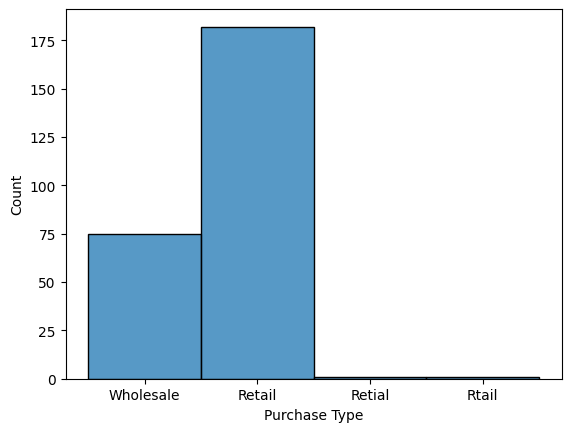

In [17]:
sns.histplot(data = df, x = "Purchase Type")

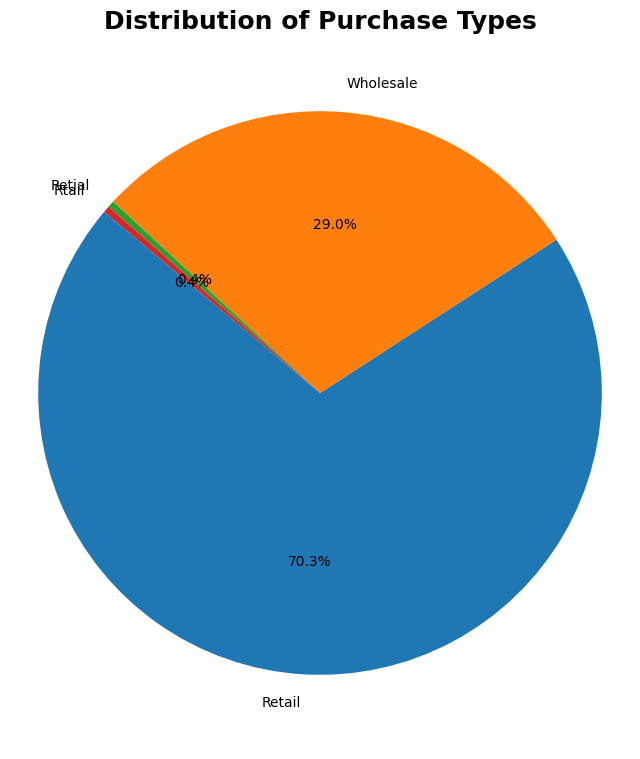

In [18]:
purchase_type_counts = df["Purchase Type"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(purchase_type_counts, labels=purchase_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purchase Types', fontsize = 18, fontweight = "bold")
plt.axis('equal') 
plt.subplots_adjust(top=1)
plt.show()

In [19]:
# you can see the graph sngle or you can see multiple 

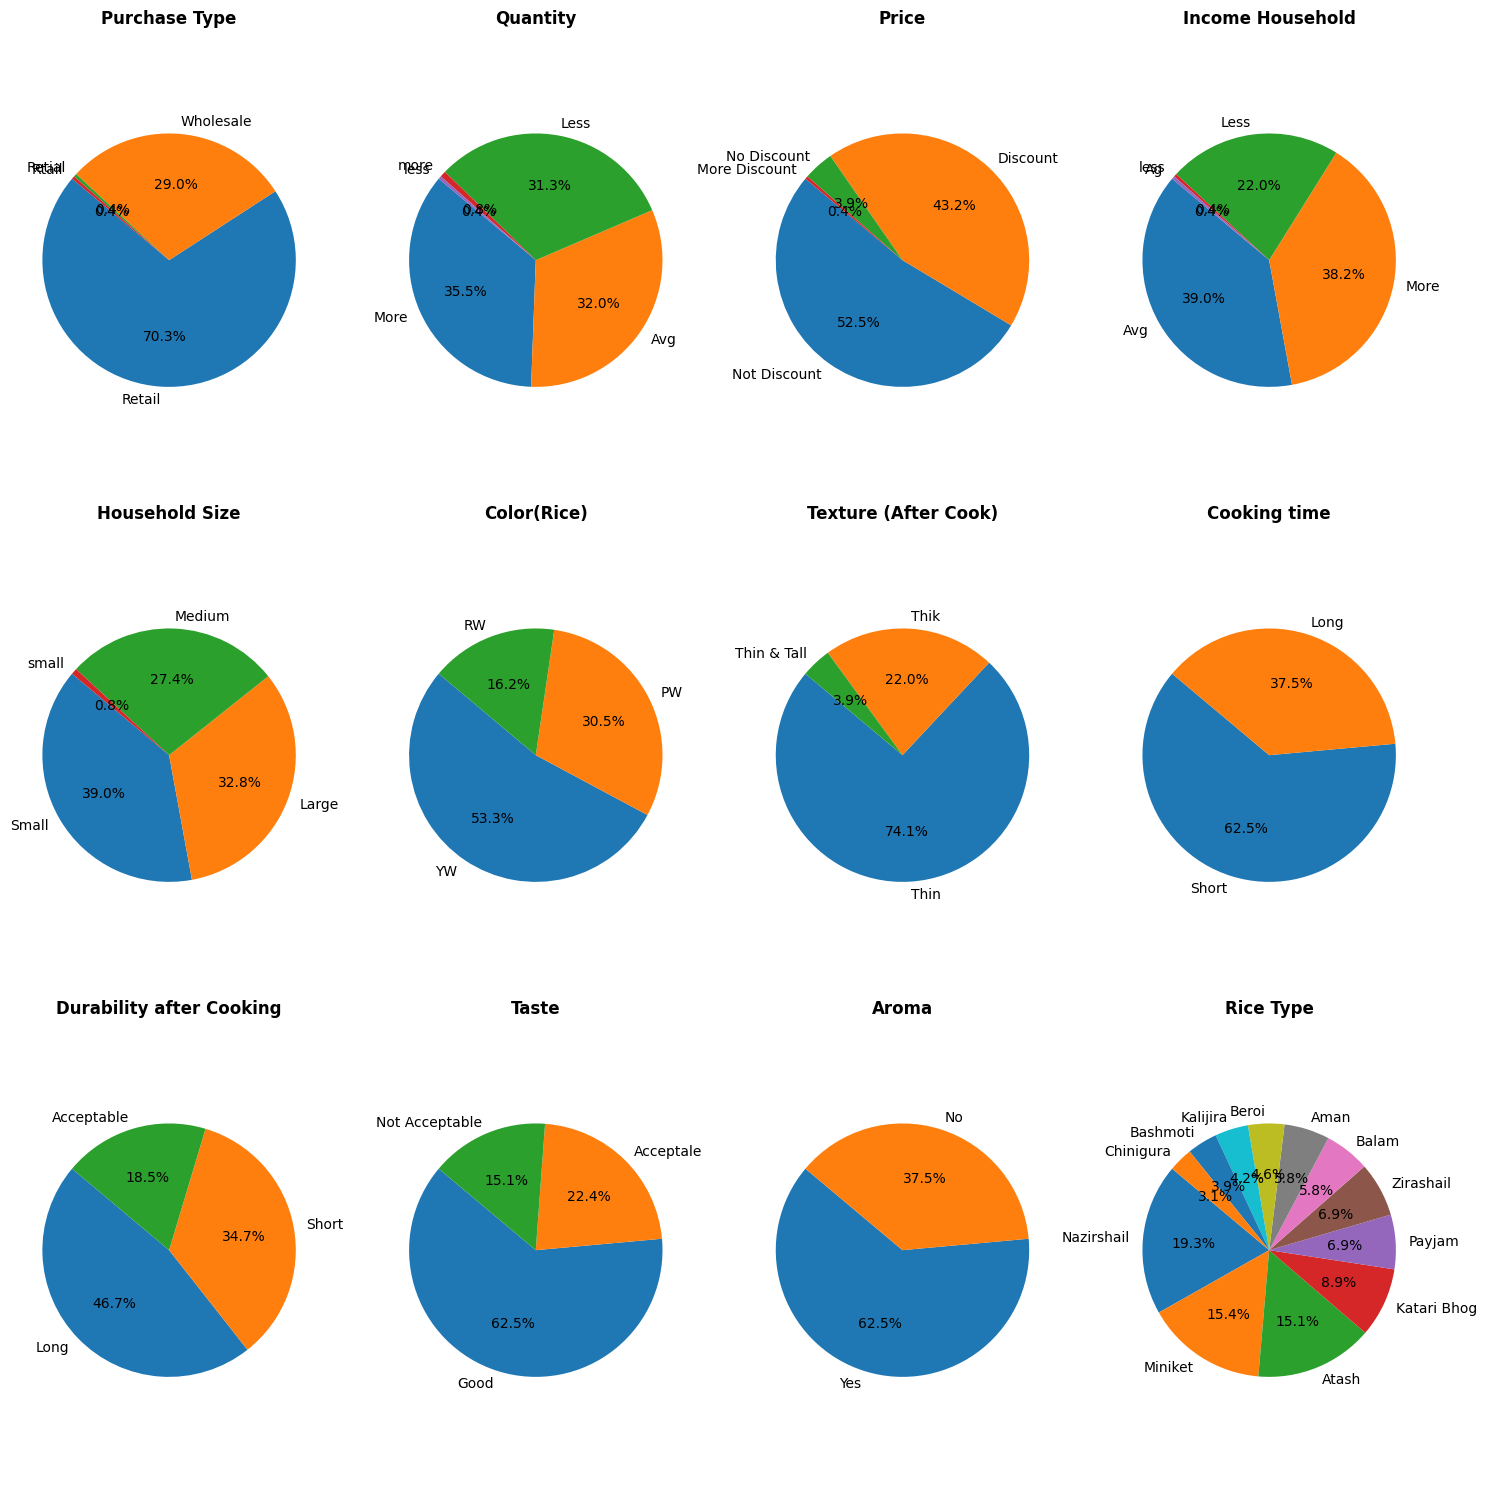

In [20]:
num_rows = 3  
num_cols = 4  

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()
for i, column in enumerate(df.columns):
    counts = df[column].value_counts()
    
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(column, fontsize=12, fontweight="bold")
    axes[i].axis('equal')
# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

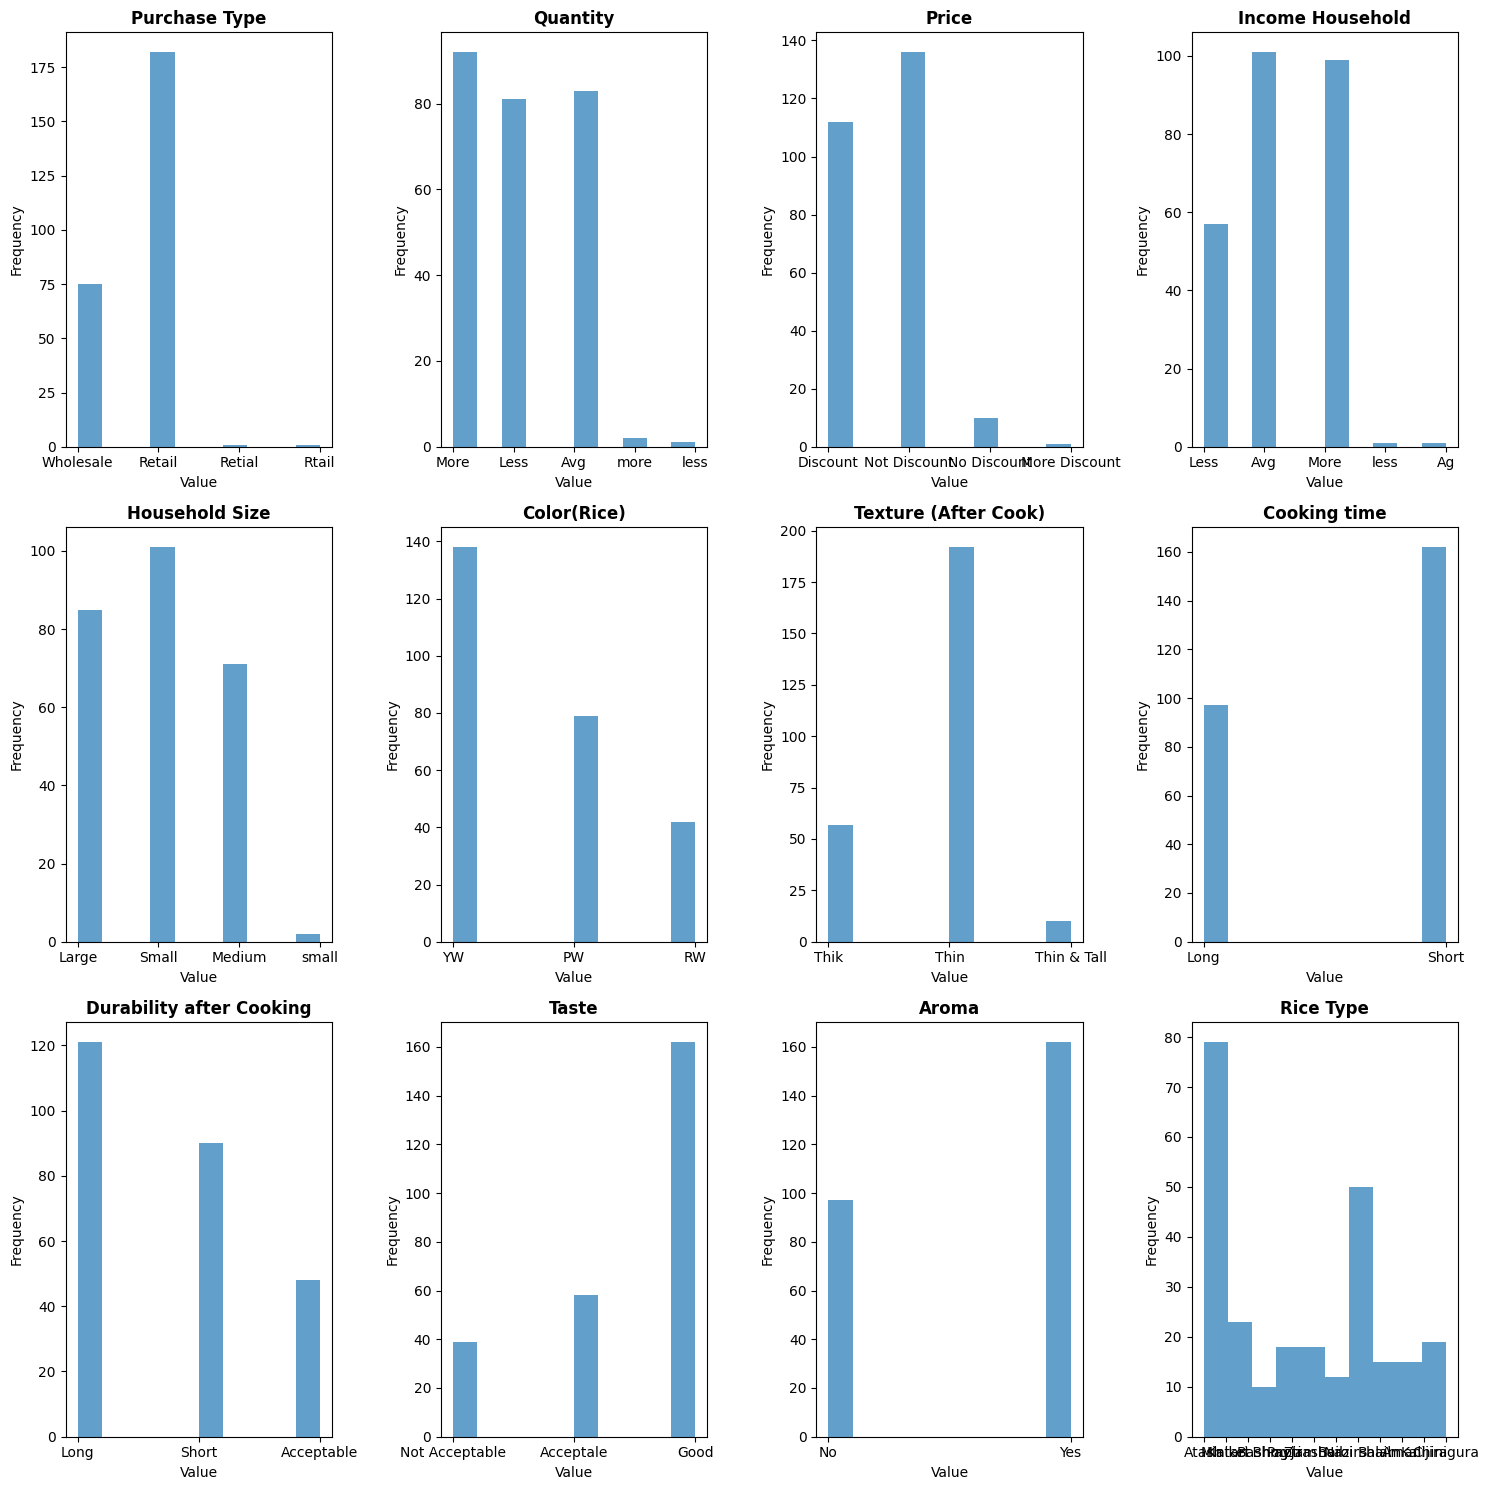

In [21]:
num_rows = 3  
num_cols = 4  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()
for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=10, alpha=0.7)
    axes[i].set_title(column, fontsize=12, fontweight="bold")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

In [22]:
# this is not clear so we can see it single 

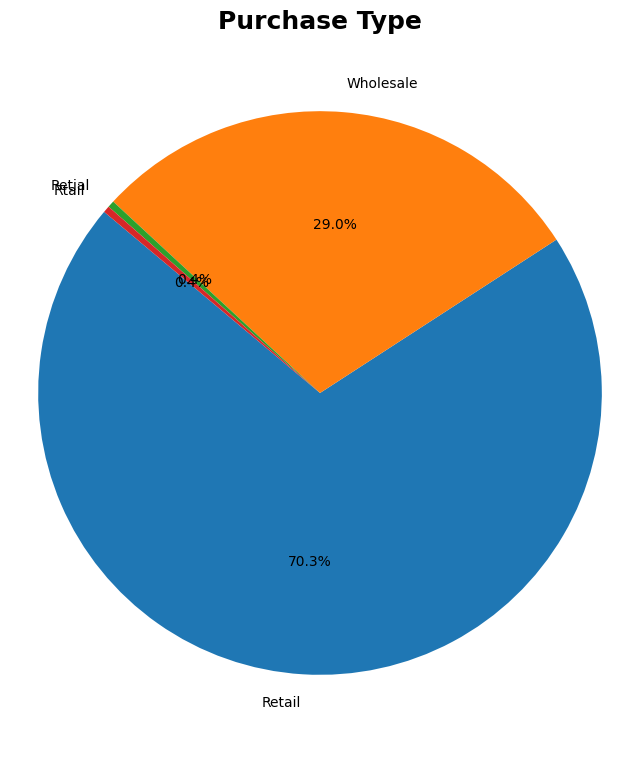

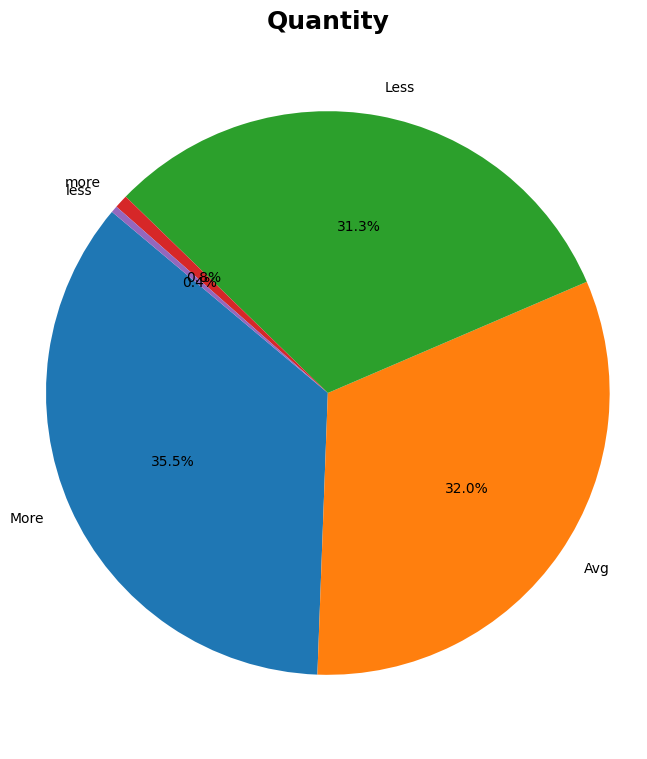

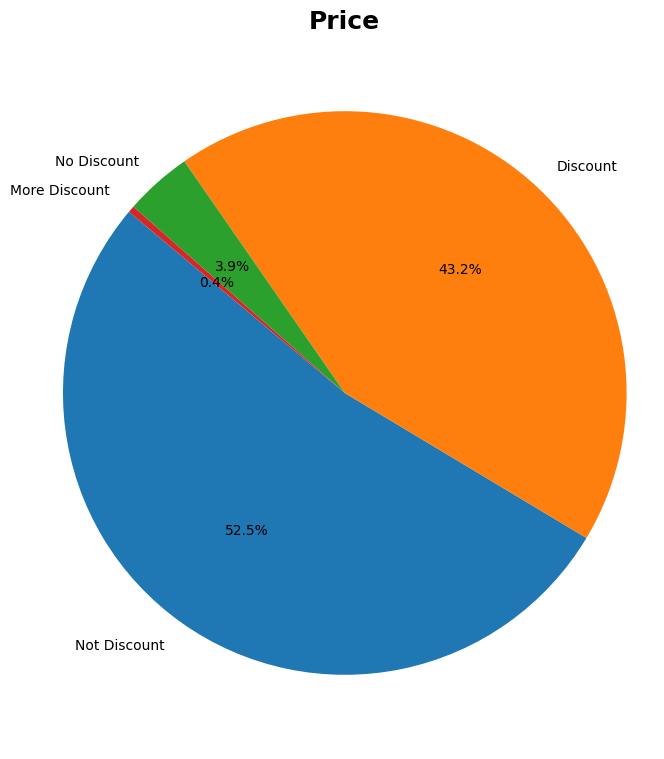

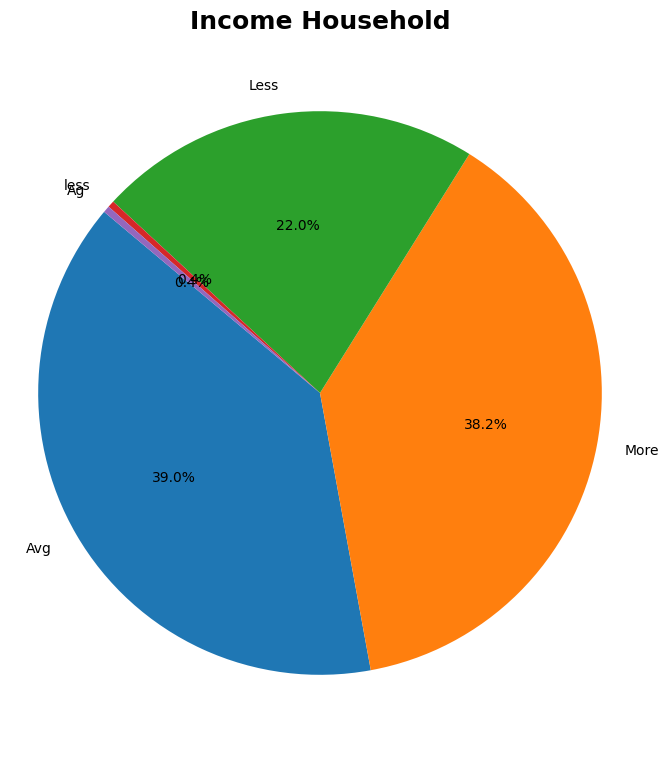

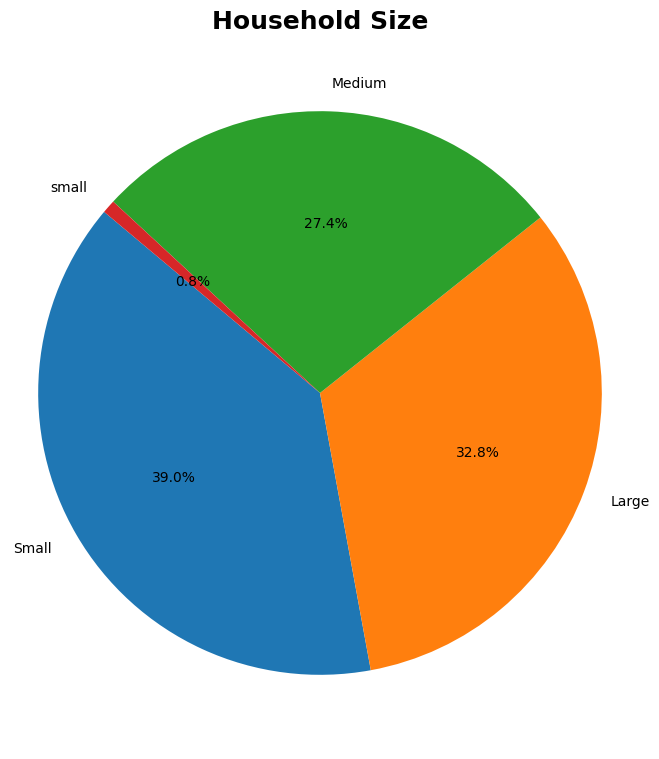

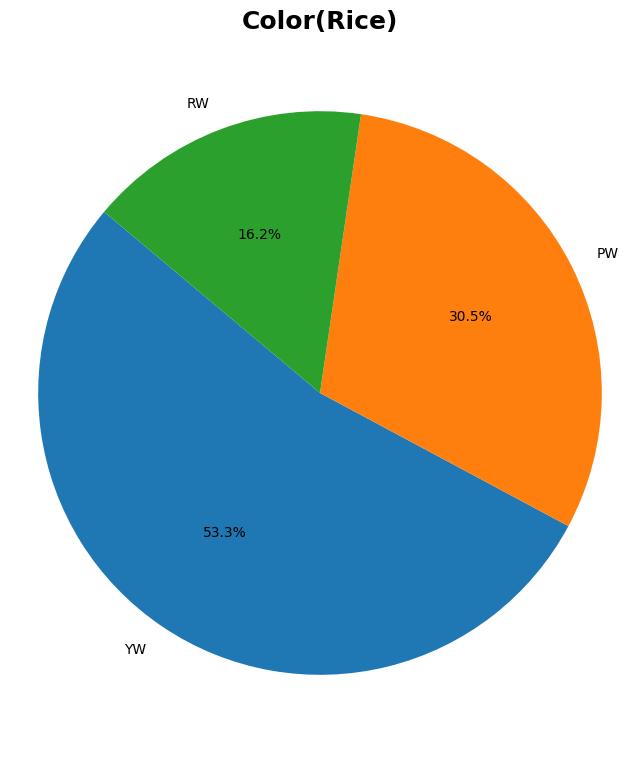

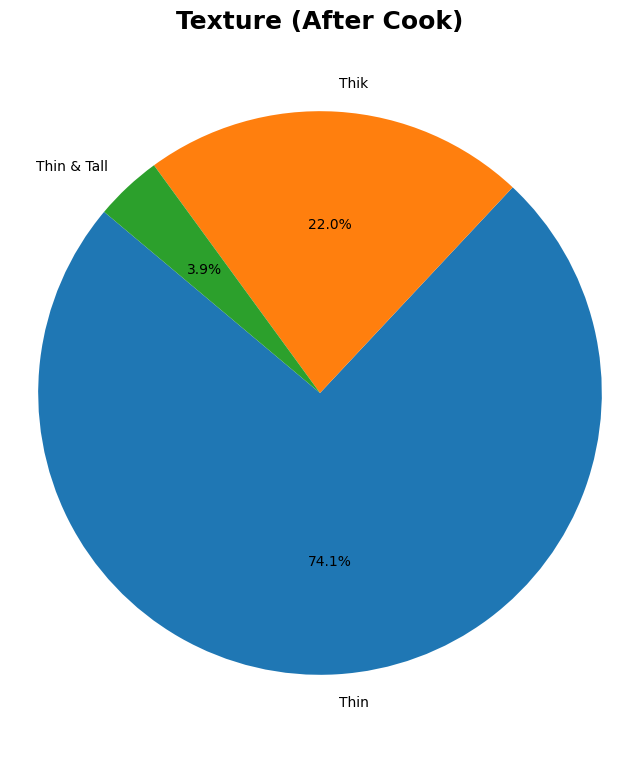

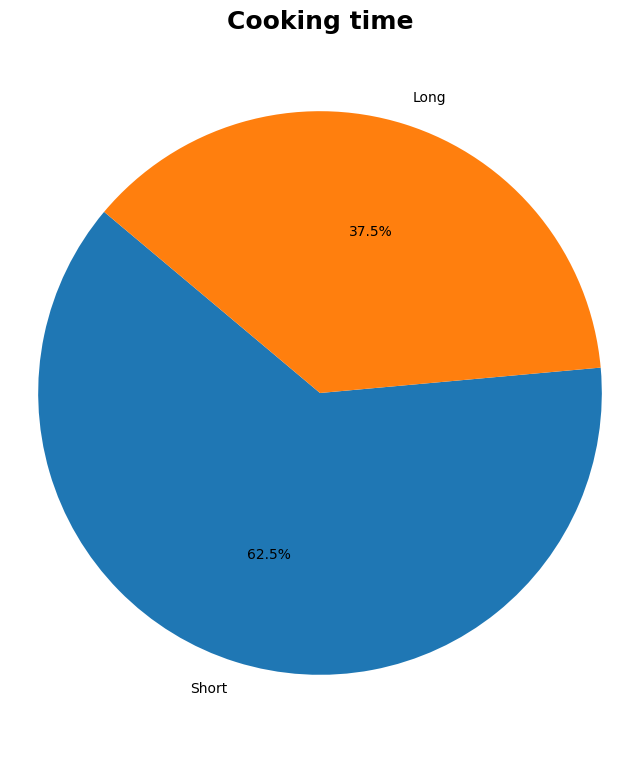

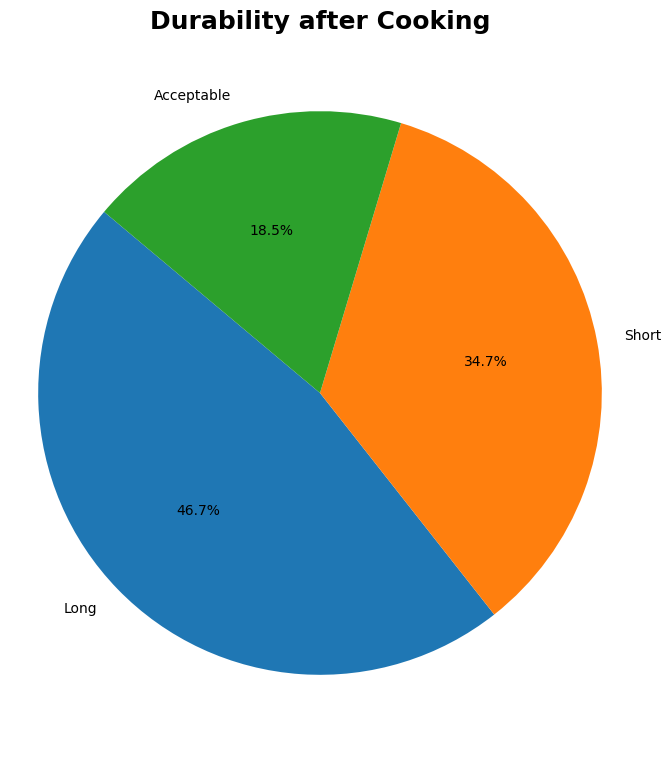

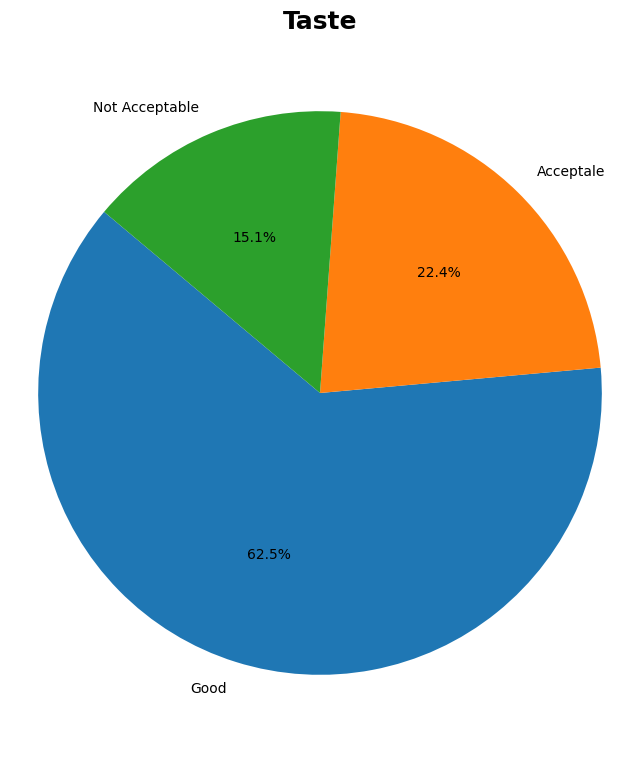

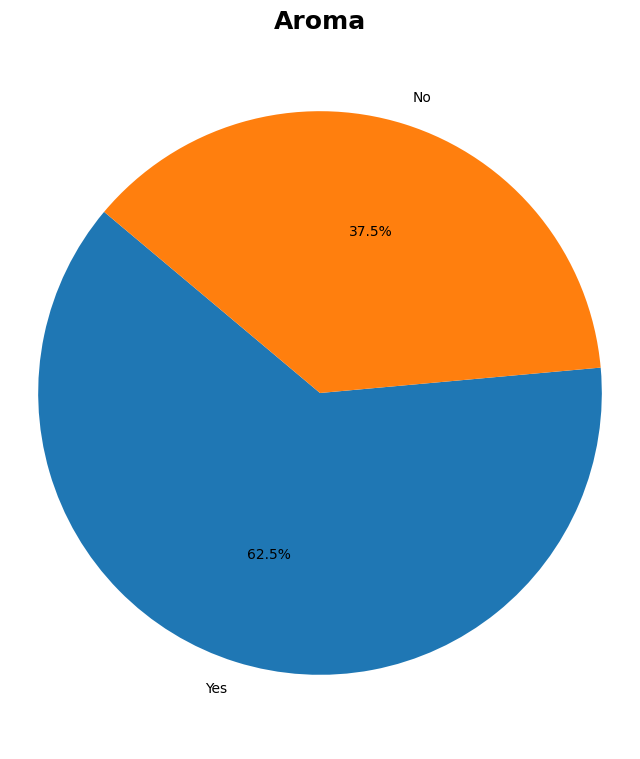

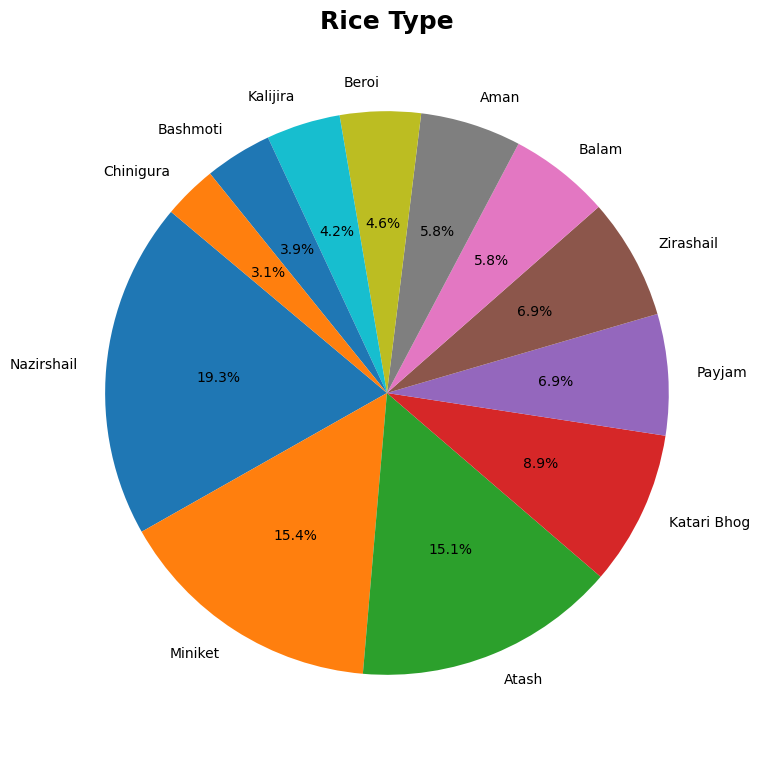

In [23]:
for column in df.columns:
    counts = df[column].value_counts()
    
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(column, fontsize=18, fontweight="bold")
    plt.axis('equal') 
    plt.subplots_adjust(top=1)
    plt.show()

# As we can see Nazirshail is the most Popular here 

In [24]:
df.columns

Index(['Purchase Type', 'Quantity', 'Price', 'Income Household',
       'Household Size', 'Color(Rice)', 'Texture (After Cook)', 'Cooking time',
       'Durability after Cooking', 'Taste', 'Aroma', 'Rice Type'],
      dtype='object')

In [25]:
# Encoding categorical variables
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [26]:
# let's have check the data how look like now 
df.head()

,Purchase Type,Quantity,Price,Income Household,Household Size,Color(Rice),Texture (After Cook),Cooking time,Durability after Cooking,Taste,Aroma,Rice Type
Customer,,,,,,,,,,,,
1,3,2,0,2,0,2,0,0,1,2,0,1
2,3,2,0,1,0,2,1,0,2,0,0,8
3,0,1,3,3,2,2,1,1,1,1,1,7
4,0,1,2,3,2,0,2,1,1,1,1,3
5,3,0,0,2,0,2,0,0,0,0,0,10


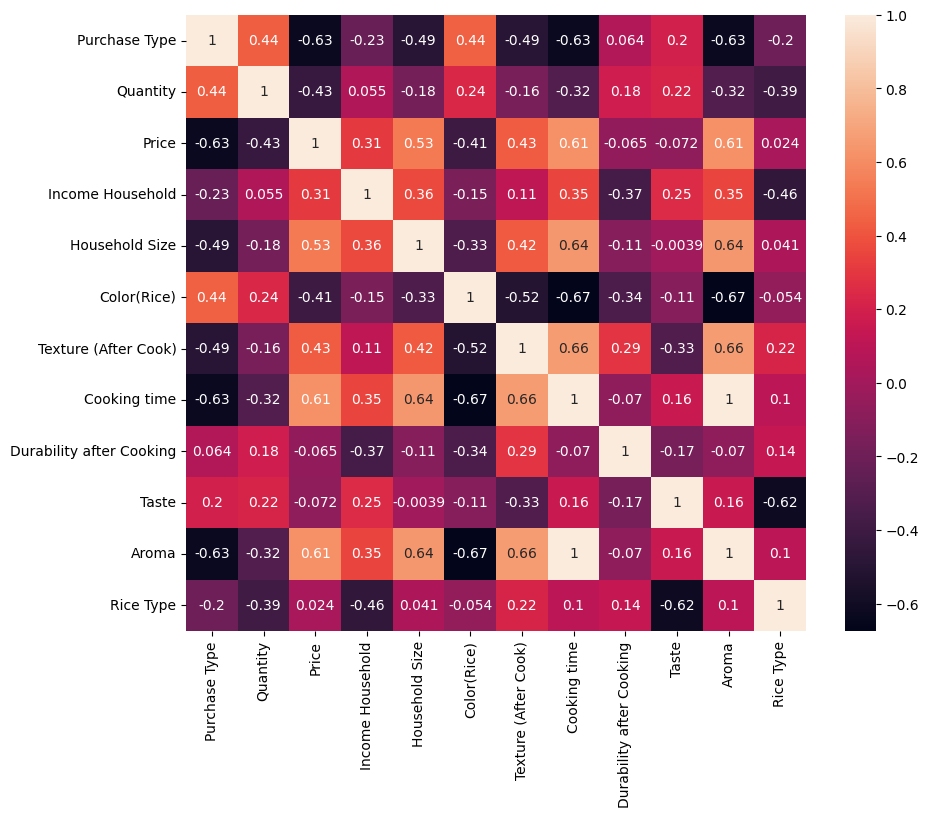

In [27]:
# so all are converted categorical from Numeric
# now let's see the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True )
plt.show()

<Axes: >

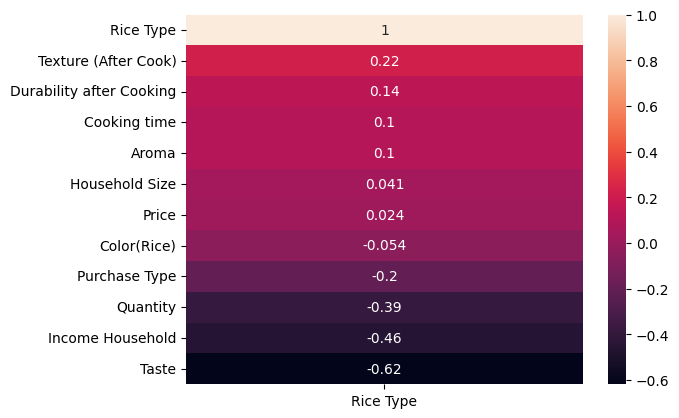

In [28]:
sns.heatmap(df.corr()[['Rice Type']].sort_values(by='Rice Type', ascending=False), annot=True)

In [29]:
# see the first 3 columns how correlate with Rice Type
# Texture (After Cook): 0.22
# Durability after Cooking: 0.14
# and maximum are negatively correlated with Rice Type

In [30]:
# Feature Selection
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Spliting The Data 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.shape, X_test.shape

((207, 11), (52, 11))

In [33]:
y_train.shape, y_test.shape

((207,), (52,))

# Choosing The Model

In [34]:
# Support Vector Machine
sv_classifier = SVC()
sv_classifier.fit(X_train, y_train)
sv_pred = sv_classifier.predict(X_test)

sv_accuracy = accuracy_score(y_test, sv_pred)

sv_r2 = r2_score(y_test, sv_pred)
sv_mse = mean_squared_error(y_test, sv_pred)
sv_mae = mean_absolute_error(y_test, sv_pred)
sv_mape = mean_absolute_percentage_error(y_test, sv_pred)

print(f"Support Vector Machine:\n Support Vector Machine Classifier Accuracy: {sv_accuracy}\n\n R2 Score: {sv_r2}")
print(f" Mean Squared Error: {sv_mse}\n Mean Absolute Error: {sv_mae}\n Mean Absolute Percentage Error: {sv_mape}")

Support Vector Machine:
 Support Vector Machine Classifier Accuracy: 0.8461538461538461

 R2 Score: 0.7573949473149676
 Mean Squared Error: 2.826923076923077
 Mean Absolute Error: 0.5961538461538461
 Mean Absolute Percentage Error: 519646110850441.9


In [35]:
# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mape = mean_absolute_percentage_error(y_test, dt_pred)

print(f"Decision Tree:\n Decision Tree Classifier Accuracy: {dt_accuracy}\n\n R2 Score: {dt_r2}")
print(f" Mean Squared Error: {dt_mse}\n Mean Absolute Error: {dt_mae}\n Mean Absolute Percentage Error: {dt_mape}")

Decision Tree:
 Decision Tree Classifier Accuracy: 0.9038461538461539

 R2 Score: 0.9768947568871398
 Mean Squared Error: 0.2692307692307692
 Mean Absolute Error: 0.15384615384615385
 Mean Absolute Percentage Error: 346430740566961.25


In [36]:
# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)

knn_r2 = r2_score(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mape = mean_absolute_percentage_error(y_test, knn_pred)

print(f"K-Nearest Neighbors:\n K-Nearest Neighbors Classifier Accuracy: {knn_accuracy}\n\n R2 Score: {knn_r2}")
print(f" Mean Squared Error: {knn_mse}\n Mean Absolute Error: {dt_mae}\n Mean Absolute Percentage Error: {knn_mape}")

K-Nearest Neighbors:
 K-Nearest Neighbors Classifier Accuracy: 0.8269230769230769

 R2 Score: 0.6270153611781135
 Mean Squared Error: 4.346153846153846
 Mean Absolute Error: 0.15384615384615385
 Mean Absolute Percentage Error: 346430740566961.44


In [37]:
# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mape = mean_absolute_percentage_error(y_test, rf_pred)

print(f"Random Forest:\n Random Classifier Accuracy: {rf_accuracy}\n\n R2 Score: {rf_r2}")
print(f" Mean Squared Error: {rf_mse}\n Mean Absolute Error: {rf_mae}\n Mean Absolute Percentage Error: {rf_mape}")

Random Forest:
 Random Classifier Accuracy: 0.9038461538461539

 R2 Score: 0.9768947568871398
 Mean Squared Error: 0.2692307692307692
 Mean Absolute Error: 0.15384615384615385
 Mean Absolute Percentage Error: 519646110850441.9


In [38]:
# Gradient Boosting
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
gb_pred = gb_classifier.predict(X_test)

gb_accuracy = accuracy_score(y_test, gb_pred)

gb_r2 = r2_score(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_mape = mean_absolute_percentage_error(y_test, gb_pred)

print(f"Gradient Boosting:\n Gradient Boosting Classifier Accuracy: {gb_accuracy}\n\n R2 Score: {gb_r2}")
print(f" Mean Squared Error: {gb_mse}\n Mean Absolute Error: {gb_mae}\n Mean Absolute Percentage Error: {gb_mape}")

Gradient Boosting:
 Gradient Boosting Classifier Accuracy: 0.9038461538461539

 R2 Score: 0.9768947568871398
 Mean Squared Error: 0.2692307692307692
 Mean Absolute Error: 0.15384615384615385
 Mean Absolute Percentage Error: 519646110850441.9


In [39]:
# So I Beleive DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier
# are the best model now up to you can choose any of them

In [40]:
# Sheikh Rasel Ahmed (Nirob)

# GitHub: https://github.com/Rasel1435
# Linkedin: https://www.linkedin.com/in/shekhnirob1
# YouTube: https://www.youtube.com/@codewithsheikhrasel
# Medium: https://medium.com/@shekhrasel59
# Kaggle: https://www.kaggle.com/sheikhraselahmed
# Upwork: https://www.upwork.com/freelancers/~01b76af87fa6e9611e
# leetcode: https://leetcode.com/shekh_rasel/
# Twitter: https://twitter.com/shekh_nirob
# Facebook: https://www.facebook.com/rasel1435
# Website: https://rasel1435.github.io/Sheikh-Rasel-Ahmed-Resume